# **MNIST Handwritten Digits Classification | CNN with Keras**  

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/MnistExamplesModified.png/320px-MnistExamplesModified.png" alt="Logo"></p>

#### **Objective:** Recognizing handwritten numbers.  

#### **Dataset:** Modified National Institute of Standards and Technology (MNIST)  
 

#### **Table of Contents:**

* **[1️⃣ | Introduction ⭐️](#1)**  

* **[2️⃣ | Load Data 🛢](#2)**
    * 2.1 🗂 Import packages
    * 2.2 🐼 Retrieve datasets  
    
   
* **[3️⃣ | Data exploration 📊](#3)**
    * 3.1 👀 Few statistics
    * 3.2 🖼 Sample Images
    * 3.3 📶 Classes distribution  
    
    
* **[4️⃣ | Data preparation 🛠](#4)**
    * 4.1 ✂️ Splitting in train and validation sets¶
    * 4.2 ➗ Normalize and reshape images  
    
    
* **[5️⃣ | Build a baseline CNN model 🤖](#5)**
    * 5.1 🧩 Model architecture
    * 5.2 📚 Compiling model
    * 5.3 ↘️ Learning Rate Decay
    * 5.4 🏋🏾‍♂️ Training the model
    * 5.5 🎯 Model performance
    * 5.6    First submission  
    
    
* **[6️⃣ | Data augmentation ⏫](#6)**

<a id="1"></a>
# 1️⃣ | Introduction ⭐️

![](https://miro.medium.com/v2/resize:fit:3744/format:webp/1*SGPGG7oeSvVlV5sOSQ2iZw.png)



<a id="2"></a>
# 2️⃣ | Load Data 🛢 

### 🗂 Import packages 

In [1]:
# core librairies
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold

# tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
print("tensorflow version:", tf.__version__)

# handle warnings
import warnings
warnings.filterwarnings("ignore")

2024-03-31 22:40:52.481599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 22:40:52.481822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 22:40:52.633405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tensorflow version: 2.15.0


### 🐼 Retrieve datasets

In [2]:
# importing training and test sets
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test  = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

<a id="3"></a>
# 3️⃣ | Data exploration 📊

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 👀 Few statistics

In [4]:
print(f"Train size: {train.shape} | Test size: {test.shape}")

Train size: (42000, 785) | Test size: (28000, 784)


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
percent_missing_train = train.isnull().sum().sum() / np.product(train.shape)
percent_missing_test  = test.isnull().sum().sum() / np.product(test.shape)

print(f"Percentage of missing data : \n\tTrain set: {percent_missing_train} % \n\tTest set : {percent_missing_test} %")

Percentage of missing data : 
	Train set: 0.0 % 
	Test set : 0.0 %


### 🖼 Sample Images

In [7]:
# dictionary for each type of label 
labels = {0 : "0", 1: "1", 2: "2", 3: "3", 4: "4",
          5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

In [8]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28, 28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train)

Total number of sample images to plot:  40


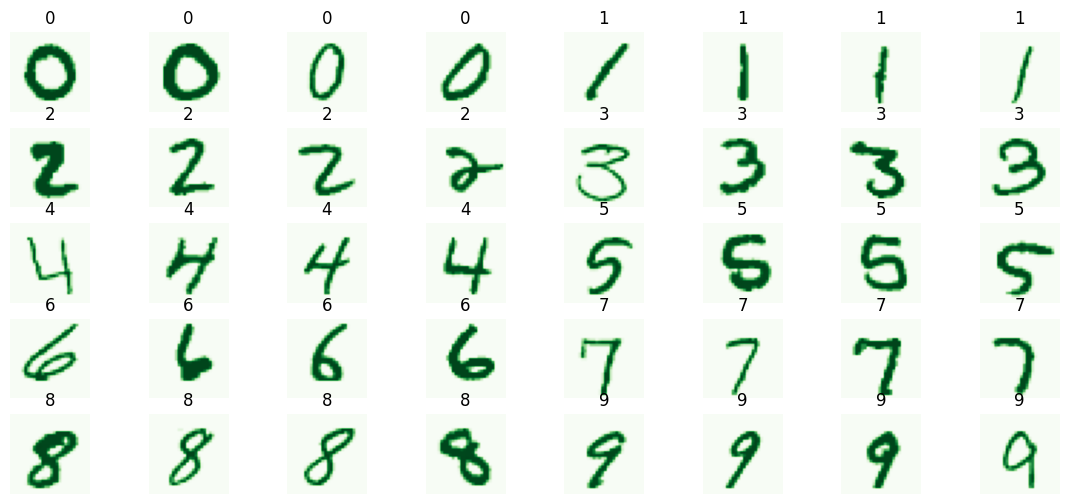

In [9]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(14,6))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

### 📶 Classes distribution

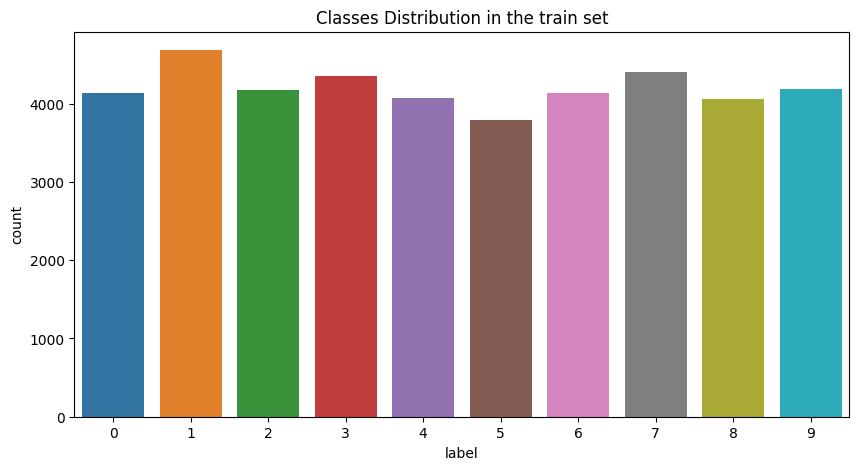

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='label')

plt.title("Classes Distribution in the train set")
plt.show()  

<a id="4"></a>
# 4️⃣ | Data preparation 🛠

### ✂️ Splitting in train and validation sets

In [11]:
X = train.drop("label", axis=1)
y = train.label

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### ➗ Normalize and reshape images

- Performing grayscale normalization (i.e., from [0,255] to [0,1]) allows to reduce the effect of illumination's differences and helps the model to converge faster on data.  
**Steps:**  
        - Sets the value of inputs between 0–1
        - Helps Gradient Descent Converge much faster
        - Brings features to equal level and weightage
        - Helps remove distortions in an image caused by light and shadows

- We have a 1D vector with 784 pixels and we have to reshape it to (28x28x1) before passing it to the CNN. 
        - This is because Keras wants an Extra Dimension in the end for channels. 
        - If these images had been RGB images, there would have been 3 channels, but as MNIST is grey scale it only uses 1.

In [12]:
X_train, X_val =   X_train / 255.0, X_val / 255.0
test    = test / 255.0

In [13]:
# reshape (-1 means unspecified)
X_train, X_val = X_train.values.reshape(-1, 28, 28, 1), X_val.values.reshape(-1, 28, 28, 1)

test_index = test.index
test = test.values.reshape(-1, 28, 28, 1)

<a id="5"></a>
# 5️⃣ | Build a baseline CNN model 🤖

### 🧩 Model architecture

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), padding='same', strides=1,  activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='same', strides=1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=1,  activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='same', strides=1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10,  activation='softmax'),
])


### 📚 Compiling model  

We need to specify how the model will “learn” its parameters. This is done through the following three steps.

- **Optimizer:** The optimizer help us minimize the error function. Ex. RMSprop, Adam, AdaGrad, AdaDelta etc...
- **Loss Function:** For Binary Classification use “binary_crossentropy” and for Multi-class Classification use “categorical_crossentropy”
- **Metrics:** to evaluate model performance.

In [15]:
# optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001, 
                                 #beta_1=0.9, 
                                 #beta_2=0.999
                                )

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### ↘️ Learning Rate Decay  
Many optimization algorithms have a constant learning rate, which will often result in not reaching a local minima.  
In using a learning rate decay, **the learning rate decreases as the model keeps training**.


- **LearningRateScheduler:** takes the step decay function as argument and returns updated learning rates for use in optimizer at every epoch stage.  
- **ReduceLRonPlateau:** monitors a quantity and if no improvement is seen for a ‘patience’ number of epochs, then the learning rate is reduced by a factor specified manually.

In [16]:
# define LearningRateScheduler
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

### 🏋🏾‍♂️ Training the model

In [17]:
batch_size = 64
epochs     = 30

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=2)

Epoch 1/30
525/525 - 97s - 184ms/step - accuracy: 0.9579 - loss: 0.1352 - val_accuracy: 0.9749 - val_loss: 0.0794
Epoch 2/30
525/525 - 139s - 265ms/step - accuracy: 0.9871 - loss: 0.0413 - val_accuracy: 0.9815 - val_loss: 0.0619
Epoch 3/30
525/525 - 92s - 176ms/step - accuracy: 0.9915 - loss: 0.0240 - val_accuracy: 0.9855 - val_loss: 0.0489
Epoch 4/30
525/525 - 143s - 273ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9861 - val_loss: 0.0488
Epoch 5/30
525/525 - 143s - 272ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9862 - val_loss: 0.0595
Epoch 6/30
525/525 - 90s - 172ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 0.9845 - val_loss: 0.0626
Epoch 7/30
525/525 - 142s - 270ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9842 - val_loss: 0.0663
Epoch 8/30
525/525 - 142s - 270ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9855 - val_loss: 0.0654
Epoch 9/30
525/525 - 141s - 269ms/step - accuracy: 0.9975 - loss: 0.0072 - val_accu

### 🎯 Model performance

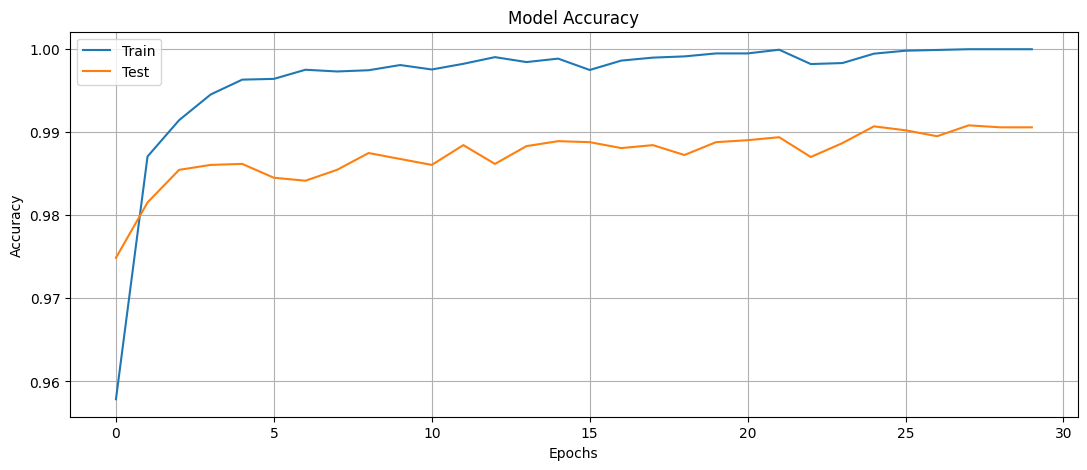

In [18]:
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

plt.grid()
plt.show()

### First Submission

In [19]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results, axis=1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step


In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_baseline.csv",index=False)

<a id="6"></a>
# 6️⃣ | Data augmentation ⏫

In Computer Vision, data augmentation is a powerful technique allowing us to artificially increase the number of images our model sees. **It helps combatting overfitting.**

This can be achieved by: 
- Rotating the Image, 
- Flipping the Image, 
- Zooming the Image, 
- Changing light conditions, 
- Cropping it etc...

But note that these transformations will not always help the model. For example, in our data, a vertical_flip would not be wise a 6 would become a 9, and a 9 would become a 6 !  

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*_C29F53XJHFkNaO5Kw9biQ.jpeg)

In [21]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
                            featurewise_center=False,                # set input mean to 0 over the dataset
                            samplewise_center=False,                 # set each sample mean to 0
                            featurewise_std_normalization=False,     # divide inputs by std of the dataset
                            samplewise_std_normalization=False,      # divide each input by its std
                            zca_whitening=False,                     # apply ZCA whitening
    
                            rotation_range=10,                       # randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range = 0.1,                        # Randomly zoom image 
                            width_shift_range=0.1,                   # randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1,                  # randomly shift images vertically (fraction of total height)
                            horizontal_flip=False,                   # randomly flip images
                            vertical_flip=False)                     # randomly flip images


datagen.fit(X_train)

### 🧩 Model architecture 2

In [22]:
"""#defining these prior to model to increase readability and debugging
batch_size = 64
epochs = 30

# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=1, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy
"""

'#defining these prior to model to increase readability and debugging\nbatch_size = 64\nepochs = 30\n\n# Fit the Model\nhistory = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, \n                              validation_data = (x_test, y_test), verbose=1, \n                              steps_per_epoch=x_train.shape[0] // batch_size,\n                              callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy\n'

# References  
[1] Digit Recognizer, https://www.kaggle.com/competitions/digit-recognizer  
[2] MNIST: Keras Simple CNN (99.6%), https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f  
[3] Introduction to CNN Keras - 0.997 (top 6%), https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6#Introduction-to-CNN-Keras---Acc-0.997-(top-8%)  
[4] MNIST - CNN, data augmentation [99.6% accuracy], https://www.kaggle.com/code/samuelcortinhas/mnist-cnn-data-augmentation-99-6-accuracy  